**In this notebook we are going to explore a dataset of loans and at the end using this dataset we are going to predict weather a loan gets approved or not**

**Let's look at the data**

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score



sns.set_style({'xtick.bottom':False,
              'ytick.left':False,
              'axes.spines.bottom':False,
              'axes.spines.top':False,
              'axes.spines.left':False,
              'axes.spines.right':False})

In [252]:
raw_data = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

raw_data['set'] = 'train'
test['set'] = 'test'

data = pd.concat([raw_data.drop(['Loan_Status'],axis=1),test],ignore_index=True,axis=0)

In [253]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,set
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,train


In [254]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,set
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [255]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


## EDA

**First lets check if there are any missing values**

In [256]:
(data.isnull().sum()/data.shape[0])*100

Loan_ID              0.000000
Gender               2.446483
Married              0.305810
Dependents           2.548420
Education            0.000000
Self_Employed        5.606524
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           2.752294
Loan_Amount_Term     2.038736
Credit_History       8.053007
Property_Area        0.000000
set                  0.000000
dtype: float64

**We have few missing values lets fill those values**

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
set                  981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [258]:
data['Gender'].fillna('Male',inplace=True)
data['Married'].fillna('Yes',inplace=True)
data['Dependents'].fillna('0',inplace=True)
data['Self_Employed'].fillna('No',inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(360,inplace=True)
data['Credit_History'].fillna(1,inplace=True)

(data.isnull().sum()/data.shape[0])*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
set                  0.0
dtype: float64

**Now lets look at the distrubution of loan amount**

C:\Users\WIN7\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


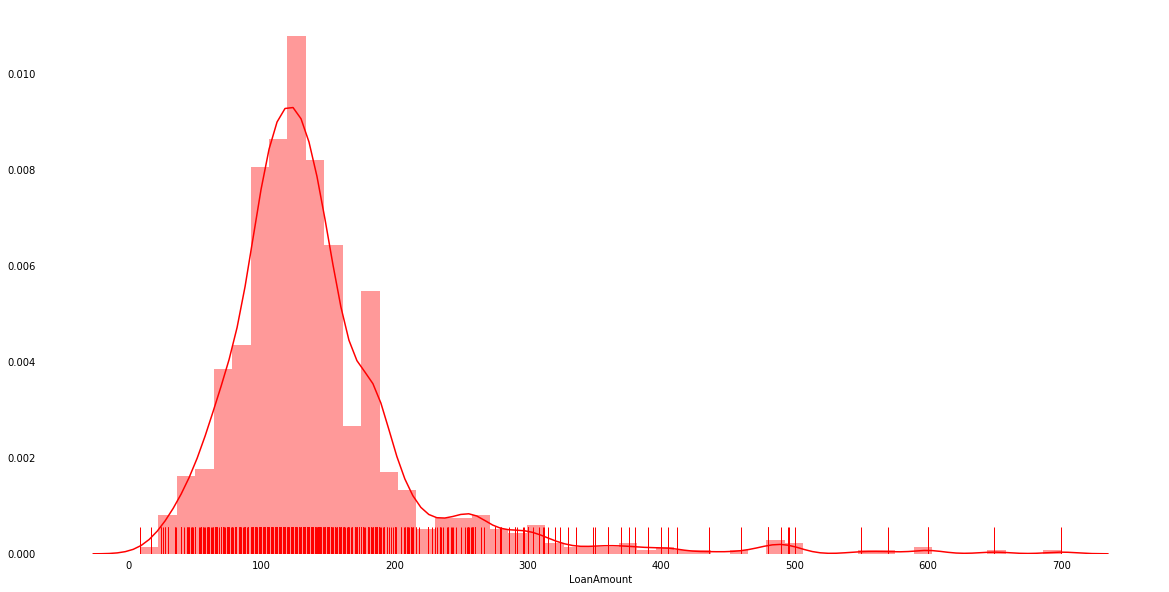

In [259]:
fig,ax = plt.subplots(figsize=(20,10))
sns.distplot(data['LoanAmount'],ax=ax,color='r',rug=True)

**Looks like there are few outliers in our data.lets examine them**

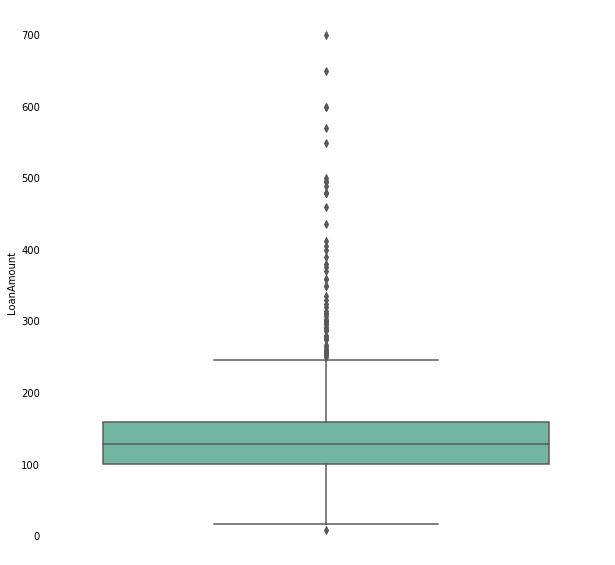

In [260]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(y = 'LoanAmount',data=data,ax=ax,palette='Set2')

In [261]:
q1 = 100
q3 = 162
iqr = q3-q1
outlier1 = q1-(1.5*iqr)
outlier2 = q3 + (1.5*iqr)

#data[data['LoanAmount'] > outlier2].shape
#data[data['LoanAmount'] < outlier1].shape

**Dropping Outliers**

In [262]:
data = data[data['LoanAmount'] < outlier2]

**Now that we took care of outliers lets proceed with our data**

**Not all of our applicants have strong applicant income,few of our applicants hatve week applicant income,so lets combine applicant income and co applicant income to one varible**

In [263]:
data['income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,set,income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,train,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,train,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,train,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,train,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,train,6000.0


In [264]:
data['log_income'] = np.log10(data['income'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,set,income,log_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,train,5849.0,3.767082
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,train,6091.0,3.784689
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,train,3000.0,3.477121
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,train,4941.0,3.693815
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,train,6000.0,3.778151


**Now lets look at the distrubution of income varible**

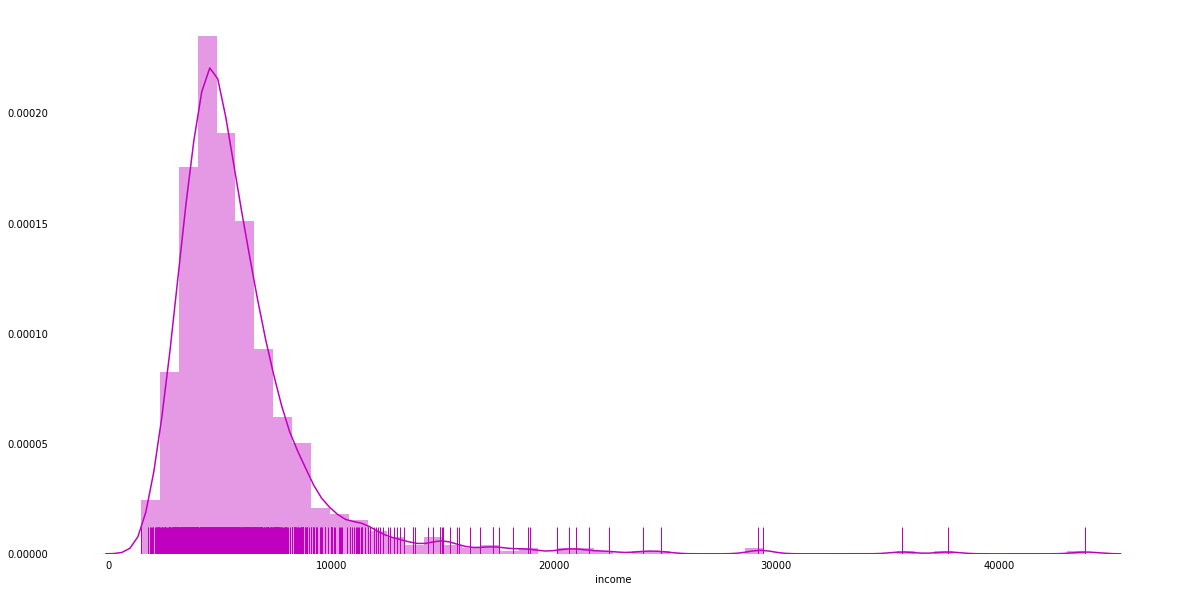

In [265]:
fig,ax = plt.subplots(figsize=(20,10))
sns.distplot(data['income'],ax=ax,color='m',rug=True)

**Looks like we have few outliers here too,lets examine them**

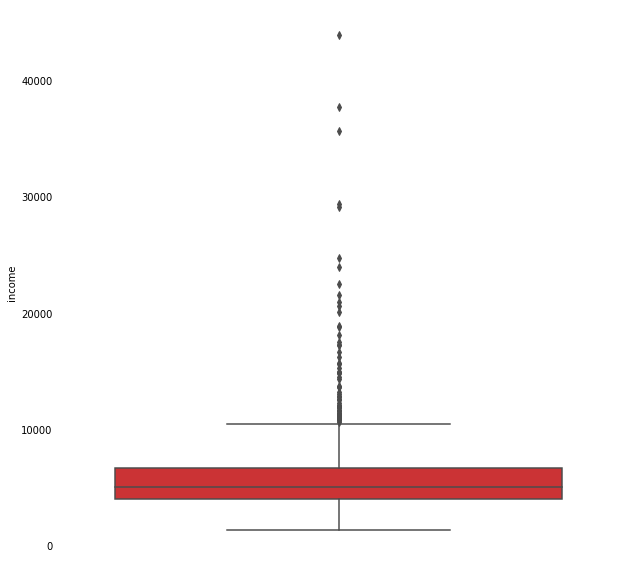

In [266]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(y = 'income',data=data,ax=ax,palette='Set1')

In [267]:
data['income'].describe()

count      913.000000
mean      5968.899146
std       3677.391527
min       1442.000000
25%       4083.000000
50%       5124.000000
75%       6700.000000
max      43897.000000
Name: income, dtype: float64

In [268]:
q1 = 4082.25
q3 = 6666.00
iqr = q3-q1
outlier1 = q1-(1.5*iqr)
outlier2 = q3 + (1.5*iqr)

#data[data['income'] > outlier2].shape
#data[data['income'] < outlier1].shape

In [269]:
data = data[data['income'] < outlier2]

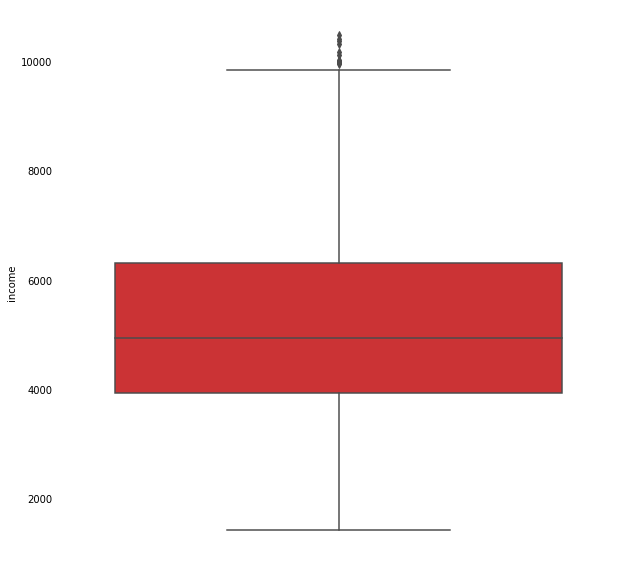

In [270]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(y = 'income',data=data,ax=ax,palette='Set1')

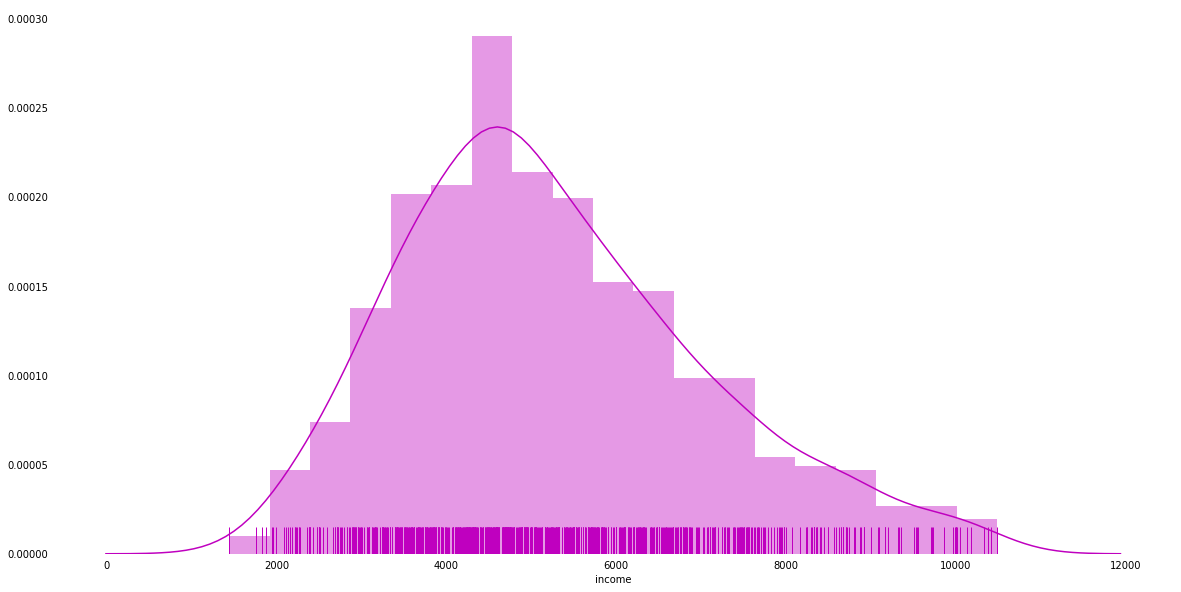

In [271]:
fig,ax = plt.subplots(figsize=(20,10))
sns.distplot(data['income'],ax=ax,color='m',rug=True)

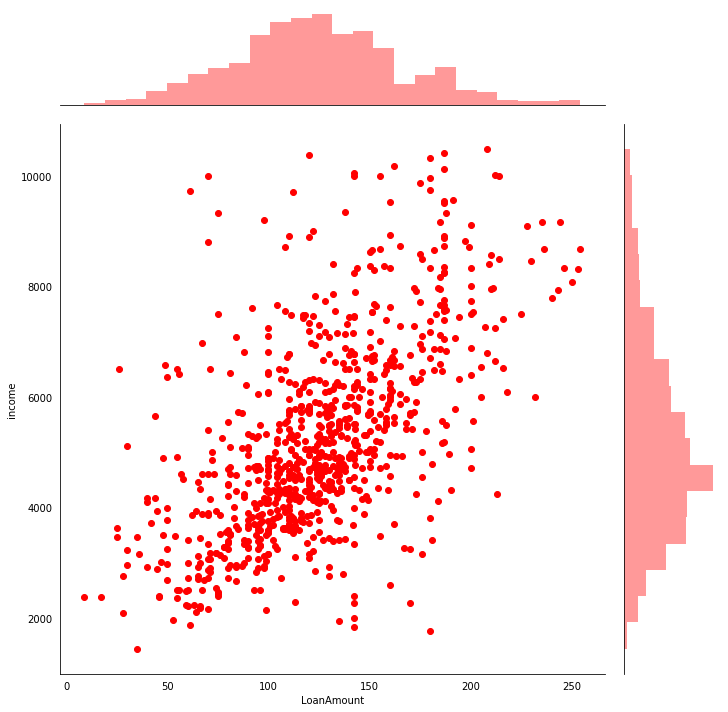

In [272]:
sns.jointplot(x='LoanAmount',y='income',data=data,color='r',height=10)

In [273]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,set,income,log_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,train,5849.0,3.767082
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,train,6091.0,3.784689
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,train,3000.0,3.477121
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,train,4941.0,3.693815
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,train,6000.0,3.778151


**Lets prepare our model**

In [274]:
def encode_data(data):
    le = LabelEncoder()
    le_cols = ['Gender', 'Married',  'Education','Self_Employed']
    du_cols = ['Dependents','Property_Area',]
    for i in le_cols:
        data[i] = le.fit_transform(data[i])
    for i in du_cols:
        du = pd.get_dummies(data[i],prefix=i,drop_first=True)
        data = pd.concat([data,du],axis=1)
        data.drop([i],axis=1,inplace=True)
    return data

In [275]:
data = encode_data(data)
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,set,income,log_income,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,142.51153,360.0,1.0,train,5849.0,3.767082,0,0,0,0,1
1,LP001003,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,train,6091.0,3.784689,1,0,0,0,0
2,LP001005,1,1,0,1,3000,0.0,66.00000,360.0,1.0,train,3000.0,3.477121,0,0,0,0,1
3,LP001006,1,1,1,0,2583,2358.0,120.00000,360.0,1.0,train,4941.0,3.693815,0,0,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.00000,360.0,1.0,train,6000.0,3.778151,0,0,0,0,1


In [276]:
train_set = data[data['set'] == 'train']
test_set = data[data['set'] == 'test']
test_set.drop(['Loan_ID','set'],axis=1,inplace=True)
train_set['Loan_Status']  = raw_data.Loan_Status.replace({'Y':1,'N':0})
train_set.head()

C:\Users\WIN7\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\WIN7\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,set,income,log_income,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,LP001002,1,0,0,0,5849,0.0,142.51153,360.0,1.0,train,5849.0,3.767082,0,0,0,0,1,1
1,LP001003,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,train,6091.0,3.784689,1,0,0,0,0,0
2,LP001005,1,1,0,1,3000,0.0,66.00000,360.0,1.0,train,3000.0,3.477121,0,0,0,0,1,1
3,LP001006,1,1,1,0,2583,2358.0,120.00000,360.0,1.0,train,4941.0,3.693815,0,0,0,0,1,1
4,LP001008,1,0,0,0,6000,0.0,141.00000,360.0,1.0,train,6000.0,3.778151,0,0,0,0,1,1


**Lets look at the correlations between our varibles before proceeding further**

In [277]:
train_set.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.567104
Property_Area_Semiurban    0.139339
Married                    0.083508
log_income                 0.072210
CoapplicantIncome          0.052373
income                     0.048577
Gender                     0.042154
Dependents_2               0.037638
ApplicantIncome            0.008715
LoanAmount                -0.004010
Loan_Amount_Term          -0.012091
Self_Employed             -0.020964
Dependents_3+             -0.026862
Dependents_1              -0.029082
Property_Area_Urban       -0.048968
Education                 -0.113535
Name: Loan_Status, dtype: float64

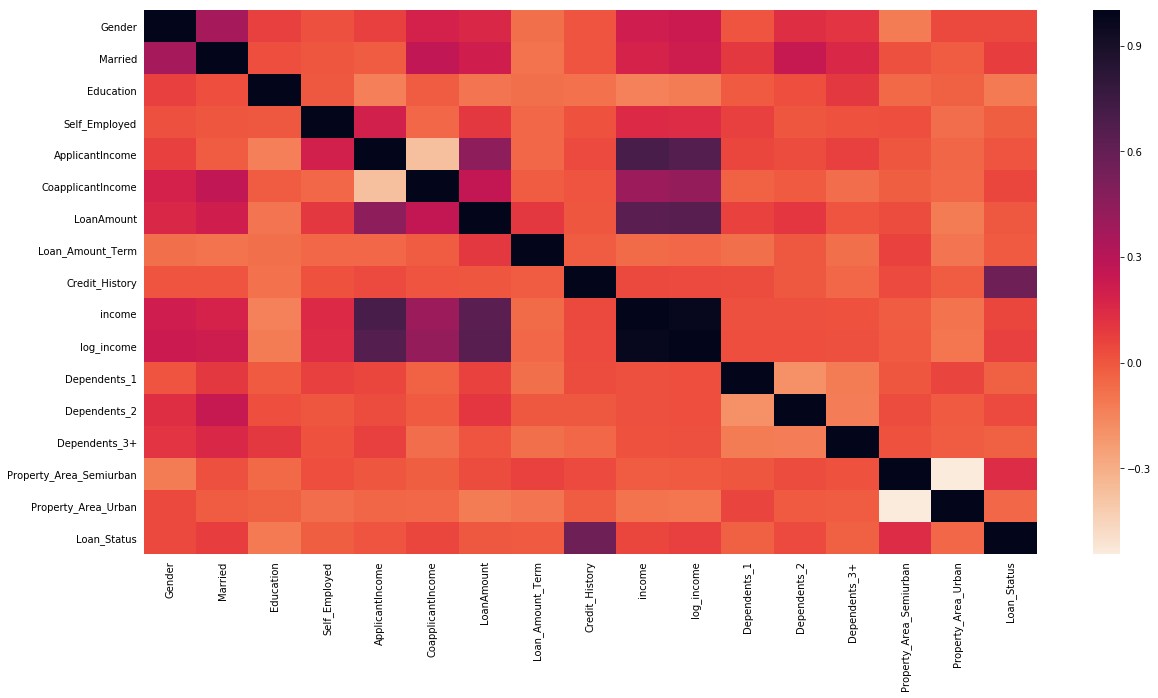

In [278]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_set.corr(),ax=ax,cmap=sns.cm.rocket_r)

In [279]:
pref_cols = ['Credit_History','Property_Area_Semiurban','Married','log_income','Gender','Dependents_2']
X = train_set[pref_cols].values
y = train_set['Loan_Status'].values

In [280]:
def selecting_model(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    yt_pred = model.predict(X_train)
    
    check_accuracy(y_test,y_pred,y_train,yt_pred)
    
def check_accuracy(y_test,y_pred,y_train,yt_pred):
    
    print('Accuracy Score of test set {}'.format(accuracy_score(y_test,y_pred)))
    print('Accuracy Score of train set {}'.format(accuracy_score(y_train,yt_pred)))
    print('==========================================================================')
    print('Roc_Auc Score of test set {}'.format(roc_auc_score(y_test,y_pred)))
    print('Roc_Auc Score of train set {}'.format(roc_auc_score(y_train,yt_pred)))
    print('==========================================================================')
    cm = confusion_matrix(y_test,y_pred)
    print(cm)

# KNN

In [294]:
sc = StandardScaler()
X_knn = sc.fit_transform(X)

In [295]:
knn = KNeighborsClassifier(n_neighbors=7,n_jobs=1,algorithm='brute',p=1)
selecting_model(knn,X_knn,y)

Accuracy Score of test set 0.8476190476190476
Accuracy Score of train set 0.8225419664268585
Roc_Auc Score of test set 0.7521367521367521
Roc_Auc Score of train set 0.73179868685799
[[15 12]
 [ 4 74]]


# Random Forest Classifier

In [282]:
rand_f = RandomForestClassifier()
params = {'n_estimators' : [10,100,150],
         'criterion' : ['gini','entropy'],
         'max_depth':[10,15],
         'min_samples_split' : [6,10],
         'min_samples_leaf' : [1,5],
         'max_features' : ['log2','sqrt'],
         'bootstrap':[True,False]}
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
grid = GridSearchCV(rand_f,param_grid=params,cv=10)
grid.fit(X_train,y_train)

C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 150], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15], 'min_samples_split': [6, 10], 'min_samples_leaf': [1, 5], 'max_features': ['log2', 'sqrt'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [283]:
selecting_model(grid.best_estimator_,X,y)

Accuracy Score of test set 0.8380952380952381
Accuracy Score of train set 0.8393285371702638
Roc_Auc Score of test set 0.7578347578347578
Roc_Auc Score of train set 0.7561156412157154
[[16 11]
 [ 6 72]]


# Logistic Regression

In [284]:
log_reg = LogisticRegression()
selecting_model(log_reg,X,y)

Accuracy Score of test set 0.8476190476190476
Accuracy Score of train set 0.815347721822542
Roc_Auc Score of test set 0.7400284900284901
Roc_Auc Score of train set 0.7145239860213914
[[14 13]
 [ 3 75]]


C:\Users\WIN7\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


|Model|Auc Score Test Set|Auc Score Train Set Set|Roc_Auc Score Test Set|Roc_Auc Score Train Set|
|-----|------------------|-----------------------|----------------------|-----------------------|
|**KNN**|0.847|0.822|0.752|0.729|
|**Random Forest**|0.838|0.829|0.757|0.737|
|**Logistic Regression**|0.847|0.815|0.740|0.714|

**KNN has performed well so lets choose this model**

In [296]:
predictions = knn.predict(sc.fit_transform(test_set[pref_cols].values))
test_set['Loan_Prediction'] = list(predictions)
test_set.head()

C:\Users\WIN7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,income,log_income,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Prediction
614,1,1,0,0,5720,0.0,110.0,360.0,1.0,5720.0,3.757396,0,0,0,0,1,1
615,1,1,0,0,3076,1500.0,126.0,360.0,1.0,4576.0,3.660486,1,0,0,0,1,1
616,1,1,0,0,5000,1800.0,208.0,360.0,1.0,6800.0,3.832509,0,1,0,0,1,1
617,1,1,0,0,2340,2546.0,100.0,360.0,1.0,4886.0,3.688953,0,1,0,0,1,1
618,1,0,1,0,3276,0.0,78.0,360.0,1.0,3276.0,3.515344,0,0,0,0,1,1


In [297]:
test_set.Loan_Prediction.value_counts()

1    268
0     64
Name: Loan_Prediction, dtype: int64

**Lets create a dummy data and check if loan will be approved**

In [298]:
raw_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'set'],
      dtype='object')

In [299]:
raw_data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [300]:
data_dummy = {
       'Name'             :['Ram','Pavani','Kiran','Tharuni'],
    
       'Gender'           :['M'  ,'F'     ,'M'    ,'F'],
    
       'Married'          :['Yes','No','No','Yes'],
    
       'Dependents'       :['0','3+','2','1'],
    
       'Education'        :['Graduate','Graduate','Graduate','Not Graduate'],
    
       'Self_Employed'    :['No','No','Yes','No'],
    
       'ApplicantIncome'  :[800,300,500,5000],
    
       'CoapplicantIncome':[1500,0,5000,200],
    
       'LoanAmount'       :[150,200,50,400],
    
       'Loan_Amount_Term' :[180,360,360,60],
    
       'Credit_History'   :[1.0,1.0,0.0,1.0],
    
       'Property_Area'    :['Semiurban','Rural','Urban','Rural']}

ds_dummy = pd.DataFrame(data=data_dummy)

ds_dummy.head()

,Name,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Ram,M,Yes,0,Graduate,No,800,1500,150,180,1.0,Semiurban
1,Pavani,F,No,3+,Graduate,No,300,0,200,360,1.0,Rural
2,Kiran,M,No,2,Graduate,Yes,500,5000,50,360,0.0,Urban
3,Tharuni,F,Yes,1,Not Graduate,No,5000,200,400,60,1.0,Rural


In [303]:
def encode_data_set(data):    
    data['income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
    data['log_income'] = np.log10(data['income'])
    le = LabelEncoder()
    le_cols = ['Gender', 'Married',  'Education','Self_Employed']
    du_cols = ['Dependents','Property_Area',]
    for i in le_cols:
        data[i] = le.fit_transform(data[i])
    for i in du_cols:
        du = pd.get_dummies(data[i],prefix=i,drop_first=True)
        data = pd.concat([data,du],axis=1)
        data.drop([i],axis=1,inplace=True)    
    return data
def predict_results(data_set):
    data = data_set.drop(['Name'],axis=1)
    data = encode_data_set(data)
    predictions = knn.predict(sc.fit_transform(data[pref_cols].values))
    data['Name'] = list(data_set.Name.values)
    data['Loan_Prediction'] = list(predictions)
    return data

In [304]:
check_data = predict_results(ds_dummy)
check_data

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,income,log_income,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Name,Loan_Prediction
0,1,1,0,0,800,1500,150,180,1.0,2300,3.361728,0,0,0,1,0,Ram,1
1,0,0,0,0,300,0,200,360,1.0,300,2.477121,0,0,1,0,0,Pavani,1
2,1,0,0,1,500,5000,50,360,0.0,5500,3.740363,0,1,0,0,1,Kiran,0
3,0,1,1,0,5000,200,400,60,1.0,5200,3.716003,1,0,0,0,0,Tharuni,1
